# Computer Science 2XC3 - Graded Lab II

Please refer to the pdf for detailed instructions. The below file contains all the preliminary code you will need to work on the lab. You can copy paste instructions here to create one cohesive lab and organize it that best suits your teams workflow.

In [74]:
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import math

In [75]:
class GraphI:

    # using hash map
    def __init__(self, edges):
        self.graph = {}
        for x,y in edges:
            if x not in self.graph.keys():
                self.graph[x]=[]
            self.graph[x].append(y)

    def has_edge(self, src, dst):
        return src in self.graph[dst]

    def get_graph_size(self,):
        return len(self.graph)

    def get_graph(self,):
        return self.graph

In [76]:
class GraphII:

    # using adjacency list
    def __init__(self, nodes):
        self.graph = []
        # node numbered 0-1
        for node in range(nodes):
            self.graph.append([])

    def has_edge(self, src, dst):
        return src in self.graph[dst]

    def add_edge(self,src,dst):
        if not self.has_edge(src,dst):
            self.graph[src].append(dst)
            self.graph[dst].append(src)

    def get_graph(self,):
        return self.graph

In [77]:
def depth_first_search(G,node,end_point=None):
    stack = [node]
    graph = G.get_graph()
    seen=set()

    while len(stack) !=0:
        node = stack.pop()
        # search for neighbours in graph
        if node not in seen:
            seen.add(node)
            #print("Visited node:" + str(node))
            # if the given node has an edge
            if node in graph.keys():
                # iterate over edges of node
                for nn in graph[node]:

                    # limited traversal
                    if nn == end_point:
                        return True
                    # add to stack
                    stack.append(nn)

In [78]:
#Breadth First Search
def breadth_first_search(G, node):
    stack = [node]
    graph = G.get_graph()
    seen=set()

    seen.add(node)

    while len(stack) > 0:
        node = stack[0]
        stack = stack[1:]
        #print("Visiting node: " + str(node))
        if node in graph.keys():
            for nn in graph[node]:
                #if node == node2:
                #    return True
                if nn not in seen:
                    stack.append(nn)
                    seen.add(nn)

In [79]:
# Using the given BFS code and modifying it

def bfs_2(G, src, dst):

    path_list = []

    stack = [src]
    graph = G.get_graph()
    seen = set()

    seen.add(src)

    path_list.append(src)

    while len(stack) > 0:
        node = stack[0]
        stack = stack[1:]
        # print("Visiting node: " + str(node))

        # Append node to new list if it hasn't been visited before
        if node not in path_list:
            path_list.append(node)
            # Return the list of nodes visited if the destination node is reached
            if node == dst:
                return path_list

        if node in graph.keys():
            for new_node in graph[node]:
                if new_node not in seen:
                    stack.append(new_node)
                    seen.add(new_node)
    return path_list

# Testing
# test_graph = GraphI([[0, 1], [1, 5], [1, 6], [5, 3], [5, 2], [5, 6], [6, 4], [6, 7]])
# test_graph.get_graph()
# # 0, 1, 5, 6, 2, 3, 4, 7
# bfs_2(test_graph, 0, 2)

In [80]:
# Using the given DFS code and modifying it

def dfs_2(G, src, dst, end_point=None):
    stack = [src]
    path_list = []
    graph = G.get_graph()
    seen = set()



    while len(stack) != 0:
        node = stack.pop()

        if node not in seen:
            seen.add(node)
            # print("Visited node: " + str(node))

            # Check if the visited node is already in path_list, and append it if not
            if node not in path_list:
                path_list.append(node)
                if node == dst:
                    return path_list

            if node in graph.keys():
                for new_node in graph[node]:
                    # Due to the given algorithm's limited implementation, it's possible for a dst node to be given that is in the graph but unreachable by the algorithm
                    if new_node == end_point:
                        return True
                    stack.append(new_node)

# Testing
# test_graph = GraphI([[1, 2], [2, 6], [6, 5], [6, 4]])
# dfs_2(test_graph, 2, 4)

In [83]:
#Using the given Breadth First Search algorithm and modifying it
def bfs_3(G, node):
    # Initializing predecessor dictionary
    pred_dict = {}
    graph = G.get_graph()

    stack = [node]
    seen=set()

    seen.add(node)


    while len(stack) > 0:

        node = stack[0]
        stack = stack[1:]
        print("Visiting node: " + str(node))


        if node in graph.keys():
            for new_node in graph[node]:

                #if node == node2:
                #    return True
                if new_node not in seen:
                    # If this node is new, it can be updated with the current node that's being iterated over
                    pred_dict[new_node] = node
                    stack.append(new_node)
                    seen.add(new_node)

    return pred_dict

# Testing
test_graph = GraphI([[1, 2], [1, 3], [2, 4], [3, 4], [3, 5], [4, 5], [4, 6]])
# test_graph.get_graph()
bfs_3(test_graph, 1)

Visiting node: 1
Visiting node: 2
Visiting node: 3
Visiting node: 4
Visiting node: 5
Visiting node: 6


{2: 1, 3: 1, 4: 2, 5: 3, 6: 4}

In [86]:
# Using the given Depth First Search Algorithm and modifying it
def dfs_3(G,node,end_point=None):
    # Initializing predecessor dictionary
    pred_dict = {}
    stack = [node]
    graph = G.get_graph()
    seen=set()


    while len(stack) !=0:
        node = stack.pop()
        # search for neighbours in graph
        if node not in seen:
            seen.add(node)
            #print("Visited node:" + str(node))
            # if the given node has an edge
            if node in graph.keys():
                # iterate over edges of node
                for new_node in graph[node]:
                    # Similar to bfs_3 implementation:
                    if new_node not in pred_dict:
                        pred_dict[new_node] = node
                    # limited traversal
                    if new_node == end_point:
                        return True
                    # add to stack
                    stack.append(new_node)

    return pred_dict

# Testing
# test_graph = GraphI([[1, 2], [1, 3], [2, 4], [3, 4], [3, 5], [4, 5], [4, 6]])
# test_graph.get_graph()
# {1: [2, 3], 2: [4], 3: [4, 5], 4: [6], 5: [4]}

# dfs_3(test_graph, 1)

In [88]:
# Since the depth_first_search algorithm given in the lab has a default "endpoint" parameter,
# We can use the DFS function on the node to see if there is a reachable path from that same node
def has_cycle(G):
    graph = G.get_graph()

    # Iterate through each node, calling the given DFS with the startpoint and endpoint parameter as that node
    for node in graph:
        result = depth_first_search(G, node, node)
        if result == True:
            return True

    # If all nodes in the graph return false from the DFS, it must mean that no cycles exist
    return False

# Testing
# test_graph = GraphI([[0, 1], [1, 2], [2, 3]])
# has_cycle(test_graph)

# test_graph = GraphI([[0, 1], [1, 2], [2, 0], [2, 3]])
# has_cycle(test_graph)

In [87]:
# Similar to Part 1.3, we can run DFS to check if a path can be found between the given startpoint and endpoint
def is_connected(G, startpoint, endpoint):
    graph = G.get_graph()

    for node in graph:
        value = depth_first_search(G, startpoint, endpoint)
        if value == True:
            return True

    return False

# Testing: Used graph example from Part 1.2, except added some disconnected nodes
# test_graph = GraphI([[1, 2], [1, 3], [2, 4], [3, 4], [3, 5], [4, 5], [4, 6], [7, 8]])
# is_connected(test_graph, 1, 8)

In [89]:
import random

def random_graph(num_nodes: int, num_edges: int):
    # Create a list for edges of the graph
    random_edges = []

    # Using a count variable to ensure the correct number of edges are added with no duplicates
    count = 0

    while count != num_edges:
        # Generating random nodes
        node_1 = random.randint(0, num_nodes)
        node_2 = random.randint(0, num_nodes)

        # Checking for duplicates
        # There can only be a single edge between two nodes, so I need to check both combinations of nodes being an edge
        # The nodes can also not be the same
        if node_1 != node_2 and [node_1, node_2] not in random_edges and [node_2, node_1] not in random_edges:
            random_edges.append([node_1, node_2])
            # Count only increments if the edge is valid
            count += 1


    random_graph = GraphI(random_edges)
    return random_graph

# Testing
# test = random_graph(20, 20)
# test
# test.get_graph()

In [90]:
def draw_show_plot(run_arr):
    x = np.arange(0, len(run_arr), 1)
    fig = plt.figure(figsize = (20,8))
    plt.bar(x,run_arr)
    plt.axhline(np.mean(run_arr), color = "red", linestyle="--", label = "Avg")
    plt.xlabel("Test #")
    plt.ylabel("Probability")
    plt.title("Average Probability")
    plt.show()

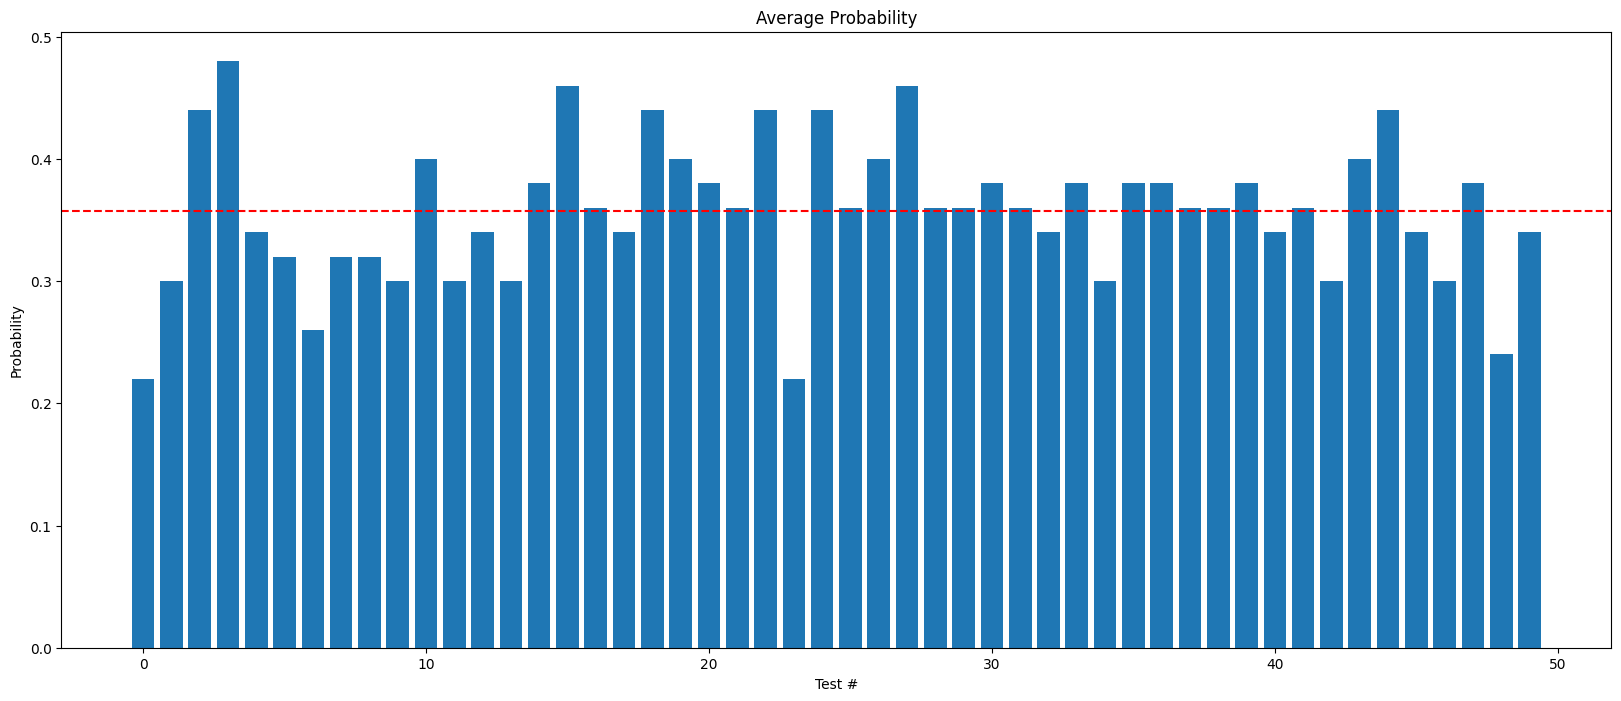

In [92]:
#1.6
#run the experiment 50 times (50 graphs will be tested, 50 times) each graph will have 20 nodes and 20 edges
runs = 50

#store the 50 probabilities in this list to make into a graph after
probabilities = []

for _ in range(runs):
  #x will be tracking how many graphs had cycles
  x = 0

  for _ in range(runs):
    G = random_graph(20, 20)
    cycle = has_cycle(G)
    if cycle:
      x += 1

  # print("The probability is", x, "/ 50 or", x/50)
  probabilities.append(x/50)
draw_show_plot(probabilities)



Reflection:

- The experiment design:
  - 50 times, a random graph is created with 20 nodes and 20 edges, and for each graph it's checked whether or not there's a cycle. At the end, the total number of graphs with cycles out of 50 is stored as the probability, and then the overall experiment is repeated 50 times to get 50 probabilities.

- In terms of iterations, as mentioned above the probability is found out of 50 graphs, and the probability is then found 50 times as it gives enough results to see what the average probability really is.

- This experiment design was chosen to ensure that enough graphs are tested and the experiment is repeated enough times to find a more accurate average probability.

- In this case the average probability of having a cycle in a random graph seems to be 0.36, which is around 18/50 graphs.

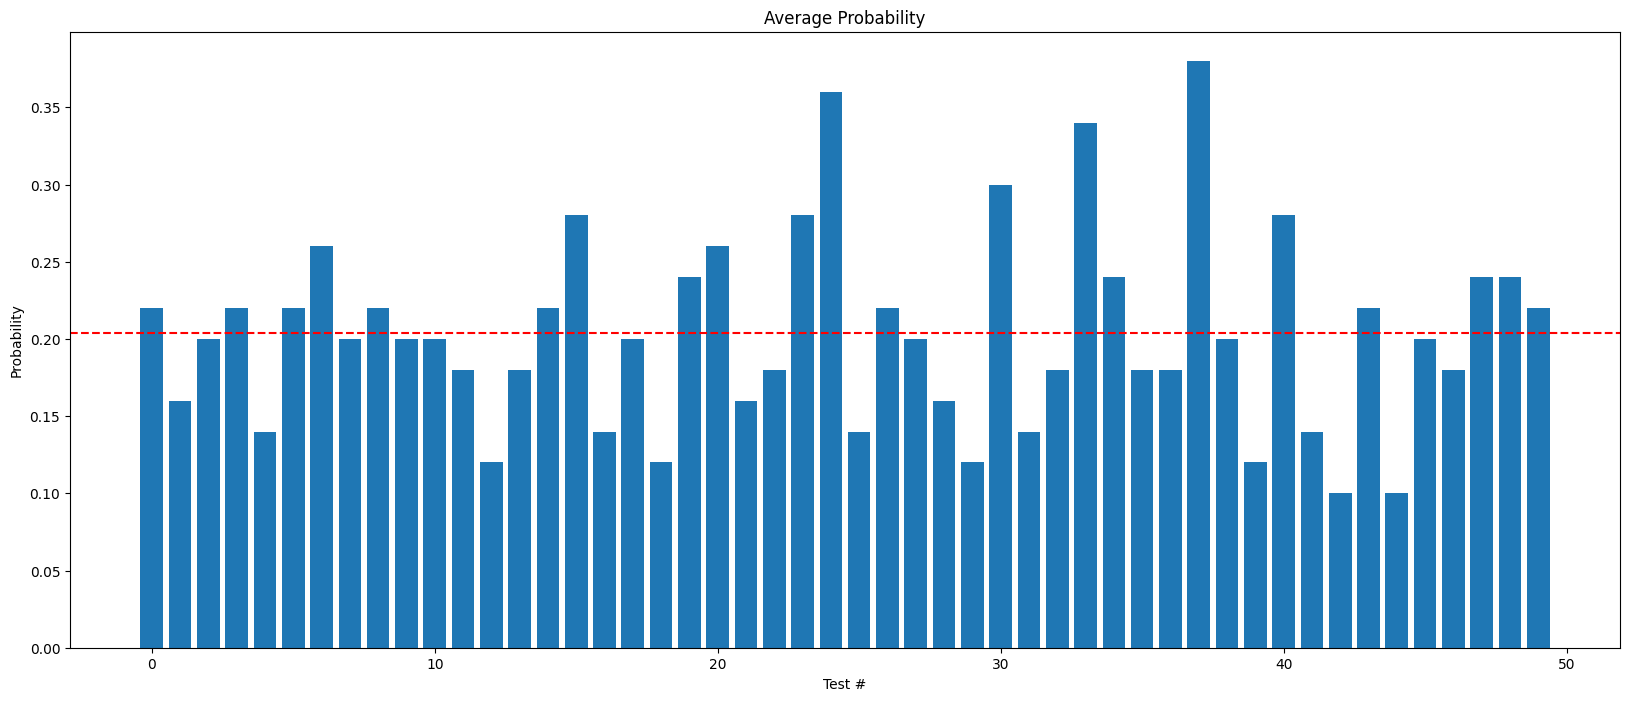

In [94]:
#1.7
#similar to 1.6 but using is_connected() instead of has_cycle(), and two random start and end points will be tested for each graph
#run the experiment 50 times (50 graphs will be tested, 50 times) each graph will have 20 nodes and 20 edges
runs = 50

#store the 50 probabilities in this list to make into a graph after
probabilities = []

for _ in range(runs):
  #x will be tracking how many graphs had cycles
  x = 0

  for _ in range(runs):
    start = []
    end = []

    G = random_graph(20, 20)

    graph = G.get_graph()
    #print(graph)
    #randomly generate integer within length of G
    #go through the keys until finding the one at the random index (for the start point, then repeat for end point)
    num = random.randint(0, len(graph)-1)
    j = 0
    for i in graph.keys():
      if j == num:
        start = i
        break
      j += 1

    num = random.randint(0, len(graph)-1)
    j = 0
    for i in graph.keys():
      if j == num:
        end = i
        break
      j += 1

    #print(start, end, is_connected(G, start, end))
    connected = is_connected(G, start, end)
    if connected:
      x += 1

  # print("The probability is", x, "/ 50 or", x/50)
  probabilities.append(x/50)
draw_show_plot(probabilities)


Reflection:

- The experiment design:

  - 50 random graphs with 20 nodes and 20 edges are created, and since is_connected() needs a start and end point as well, a random start node and end node is selected for each graph.

  - The number of these 50 graphs that were connected is stored out of 50, and then this overall experiment is repeated 50 times to end with 50 probabilities.

- This experiment has 50 iterations per probability calculation, and 50 probabilities are found, and this design was chosen to ensure that enough graphs are tested and enough probabilities are found that the average at the end is more accurate.

- The results for this experiment show that the average probability of a random graph with 20 nodes and 20 edges being connected is around 0.21, which is around 10/50 graphs.

In [ ]:
#Use the methods below to determine minimum vertex covers

def add_to_each(sets, element):
    copy = sets.copy()
    for set in copy:
        set.append(element)
    return copy

def power_set(set):
    if set == []:
        return [[]]
    return power_set(set[1:]) + add_to_each(power_set(set[1:]), set[0])

def is_vertex_cover(G, C):
    for start in G.adj:
        for end in G.adj[start]:
            if not(start in C or end in C):
                return False
    return True

def MVC(G):
    nodes = [i for i in range(G.get_size())]
    subsets = power_set(nodes)
    min_cover = nodes
    for subset in subsets:
        if is_vertex_cover(G, subset):
            if len(subset) < len(min_cover):
                min_cover = subset
    return min_cover
